In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data cleaning and preprocessing.

In [2]:
# Load the datasets
customer_df = pd.read_csv('../rawDataset/customer.csv')
market_trend_df = pd.read_csv('../rawDataset/marketTrend.csv')
product_detail_df = pd.read_csv('../rawDataset/productDetail.csv')
product_group_df = pd.read_csv('../rawDataset/productGroup.csv')
sale_df = pd.read_csv('../rawDataset/sale.csv')
website_access_category_df = pd.read_csv('../rawDataset/websiteAccessCategory.csv')

In [3]:
# Display the first few rows of each DataFrame
customer_head = customer_df.head()
market_trend_head = market_trend_df.head()
product_detail_head = product_detail_df.head()
product_group_head = product_group_df.head()
sale_head = sale_df.head()
website_access_category_head = website_access_category_df.head()

customer_head, market_trend_head, product_detail_head, product_group_head, sale_head, website_access_category_head

(   CustomerID FirstName LastName                      Email PhoneNumber  \
 0           1      John      Doe       john.doe@example.com    555-1234   
 1           2      Jane    Smith     jane.smith@example.com    555-5678   
 2           3     Emily  Johnson  emily.johnson@example.com    555-8765   
 3           4   Michael    Brown  michael.brown@example.com    555-4321   
 4           5     Sarah    Davis    sarah.davis@example.com    555-9876   
 
         Address       City State  PostalCode Country  
 0   123 Main St    Anytown    CA       90210     USA  
 1    456 Oak St  Somewhere    TX       73301     USA  
 2   789 Pine St   Anywhere    NY       10001     USA  
 3    321 Elm St  Everytown    FL       33101     USA  
 4  654 Maple St   Anyplace    WA       98101     USA  ,
    TrendID  ProductGroupID                                  TrendDescription  \
 0        1               1   Increased demand due to new technology features   
 1        2               1  Decline in sal

In [4]:
# Check for missing values in each DataFrame
customer_missing = customer_df.isnull().sum()
market_trend_missing = market_trend_df.isnull().sum()
product_detail_missing = product_detail_df.isnull().sum()
product_group_missing = product_group_df.isnull().sum()
sale_missing = sale_df.isnull().sum()
website_access_category_missing = website_access_category_df.isnull().sum()

customer_missing, market_trend_missing, product_detail_missing, product_group_missing, sale_missing, website_access_category_missing


(CustomerID     0
 FirstName      0
 LastName       0
 Email          0
 PhoneNumber    0
 Address        0
 City           0
 State          0
 PostalCode     0
 Country        0
 dtype: int64,
 TrendID                 0
 ProductGroupID          0
 TrendDescription        0
 TrendDate               0
 SalesVolume             0
 MarketShare             0
 CompetitorActivity      0
 CustomerFeedback        0
 EconomicFactors         0
 SeasonalImpact          0
 Notes                 100
 dtype: int64,
 ProductID         0
 ProductName       0
 ProductGroupID    0
 Description       0
 Price             0
 Cost              0
 StockQuantity     0
 ReorderLevel      0
 SupplierID        0
 WarrantyPeriod    0
 IsActive          0
 GroupManagerID    0
 Notes             0
 dtype: int64,
 ProductGroupID    0
 GroupName         0
 Category          0
 Description       0
 ParentGroupID     0
 CreatedDate       0
 UpdatedDate       0
 IsActive          0
 GroupManagerID    0
 Notes          

In [5]:
# Fill missing values in 'Notes' column with "No notes"
market_trend_df.fillna({'Notes': 'No notes'}, inplace=True)

# Verify that there are no more missing values
market_trend_missing_after = market_trend_df.isnull().sum()
market_trend_missing_after

TrendID               0
ProductGroupID        0
TrendDescription      0
TrendDate             0
SalesVolume           0
MarketShare           0
CompetitorActivity    0
CustomerFeedback      0
EconomicFactors       0
SeasonalImpact        0
Notes                 0
dtype: int64

In [6]:
# Remove duplicates in each DataFrame
customer_df.drop_duplicates(inplace=True)
market_trend_df.drop_duplicates(inplace=True)
product_detail_df.drop_duplicates(inplace=True)
product_group_df.drop_duplicates(inplace=True)
sale_df.drop_duplicates(inplace=True)
website_access_category_df.drop_duplicates(inplace=True)

# Verify no duplicates
customer_duplicates = customer_df.duplicated().sum()
market_trend_duplicates = market_trend_df.duplicated().sum()
product_detail_duplicates = product_detail_df.duplicated().sum()
product_group_duplicates = product_group_df.duplicated().sum()
sale_duplicates = sale_df.duplicated().sum()
website_access_category_duplicates = website_access_category_df.duplicated().sum()

customer_duplicates, market_trend_duplicates, product_detail_duplicates, product_group_duplicates, sale_duplicates, website_access_category_duplicates

(0, 0, 0, 0, 0, 0)

In [7]:
# Convert date columns to datetime
market_trend_df['TrendDate'] = pd.to_datetime(market_trend_df['TrendDate'])
sale_df['SaleDate'] = pd.to_datetime(sale_df['SaleDate'])
website_access_category_df['AccessDate'] = pd.to_datetime(website_access_category_df['AccessDate'])

# Verify the changes
market_trend_df.info(), sale_df.info(), website_access_category_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TrendID             100 non-null    int64         
 1   ProductGroupID      100 non-null    int64         
 2   TrendDescription    100 non-null    object        
 3   TrendDate           100 non-null    datetime64[ns]
 4   SalesVolume         100 non-null    int64         
 5   MarketShare         100 non-null    float64       
 6   CompetitorActivity  100 non-null    object        
 7   CustomerFeedback    100 non-null    object        
 8   EconomicFactors     100 non-null    object        
 9   SeasonalImpact      100 non-null    bool          
 10  Notes               100 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 8.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data c

(None, None, None)

In [8]:
# Save the cleaned DataFrames
customer_df.to_csv('../cleanedDataset/cleaned_customer.csv', index=False)
market_trend_df.to_csv('../cleanedDataset/cleaned_market_trend.csv', index=False)
product_detail_df.to_csv('../cleanedDataset/cleaned_product_detail.csv', index=False)
product_group_df.to_csv('../cleanedDataset/cleaned_product_group.csv', index=False)
sale_df.to_csv('../cleanedDataset/cleaned_sale.csv', index=False)
website_access_category_df.to_csv('../cleanedDataset/cleaned_website_access_category.csv', index=False)

# Data Visualization.

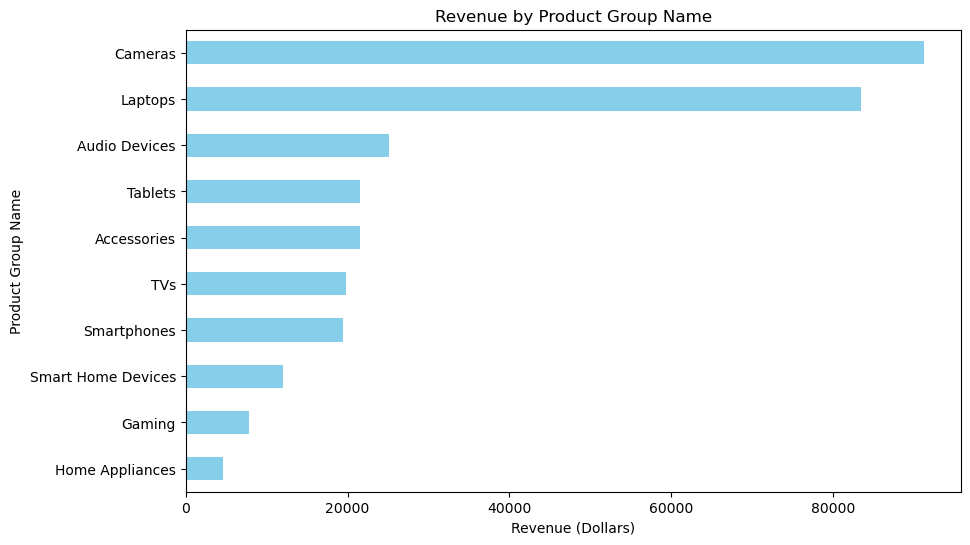

In [18]:
# Merge product group and sale data
merged_data = pd.merge(sale_df, product_detail_df, on='ProductID')
merged_data = pd.merge(merged_data, product_group_df, on='ProductGroupID')

# Aggregate total price by product group name
total_price_by_group = merged_data.groupby('GroupName')['TotalPrice'].sum().sort_values()

# Create the bar chart
plt.figure(figsize=(10, 6))
total_price_by_group.plot(kind='barh', color='skyblue')
plt.xlabel('Revenue (Dollars)')
plt.ylabel('Product Group Name')
plt.title('Revenue by Product Group Name')
plt.show()


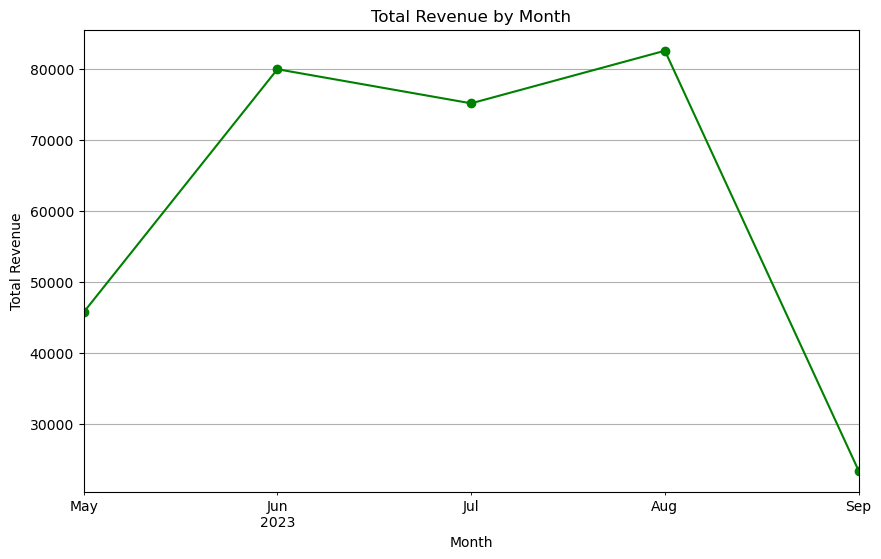

In [19]:
# Ensure the SaleDate is in datetime format
sale_df['SaleDate'] = pd.to_datetime(sale_df['SaleDate'])

# Extract month and year from SaleDate
sale_df['YearMonth'] = sale_df['SaleDate'].dt.to_period('M')

# Aggregate total revenue by YearMonth
monthly_revenue = sale_df.groupby('YearMonth')['TotalPrice'].sum()

# Create the line chart
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.grid(True)
plt.show()


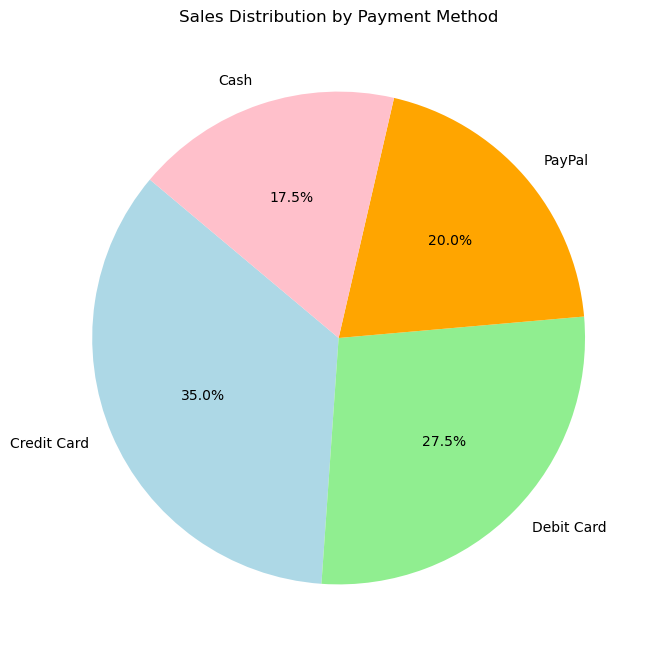

In [21]:

# Aggregate the number of sales by payment method
payment_method_distribution = sale_df['PaymentMethod'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
payment_method_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'orange', 'pink'])
plt.title('Sales Distribution by Payment Method')
plt.ylabel('')  # Hide the y-label for better visual presentation
plt.show()


# Linear Regression
